In [444]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [445]:
# get current working directory
cwd = os.getcwd()

In [604]:
%cd /Users/efz/British Airline Data Science Virtual Internship Program

file_path = "./customer_booking.csv"

df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(df.head())

[Errno 2] No such file or directory: '/Users/efz/British Airline Data Science Virtual Internship Program'
/Users/efz/Data Science Projects/British Airline
   num_passengers  sales_channel  trip_type purchase_lead  length_of_stay  \
0               2              1          2   2.418301291              19   
1               1              1          2   2.049218023              20   
2               2              1          2   2.385606274              22   
3               1              1          2   1.982271233              31   
4               2              1          2   1.832508913              22   

   flight_hour  flight_day  wants_extra_baggage  wants_preferred_seat  \
0            7           6                    1                     0   
1            3           6                    0                     0   
2           17           3                    1                     1   
3            4           6                    0                     0   
4           15   

/var/folders/qf/ln0kgyzd06b72cv7tfyc42_w0000gn/T/ipykernel_8683/1550979616.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="ISO-8859-1")


In [447]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [448]:
df_final = df

In [449]:
#Scikit-learn, commonly abbreviated as sklearn
#a popular machine learning library for Python that works with pandas,matpplotlib
#provides a range of tools for data mining, data analysis, and machine learning.
#Machine Learning: classification,clustering, regression,dimensionality reduction,etc
#Scikit-learn also covers model evaluation and optimization tools


In [450]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [451]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)


In [452]:
#store the label for supervised learning
label = df['booking_complete']

In [453]:
df_final = df_final.drop('booking_complete', axis=1)

In [454]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,Sat,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [455]:
## Normalizaing the values - Data Preprocessing
## We have non-numeric value in the dataset
## and therefore we should pre-process the dataset to remove non-numeric column

from sklearn.preprocessing import StandardScaler

# create a copy of the original dataframe
df = df_final.copy()

# select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_final_numeric = df[numeric_cols]

# create a standard scaler object
scaler = StandardScaler()

# fit and transform the data
scaled_df_final_numeric  = scaler.fit_transform(df_final_numeric)

#create a dataframe of scled data
scaled_df_final_numeric = pd.DataFrame(scaled_df_final_numeric, columns = df_final_numeric.columns)

In [456]:
# add the labels back to the dataframe
scaled_df_final_numeric['label']  = label

In [457]:
scaled_df_final_numeric

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


<AxesSubplot:>

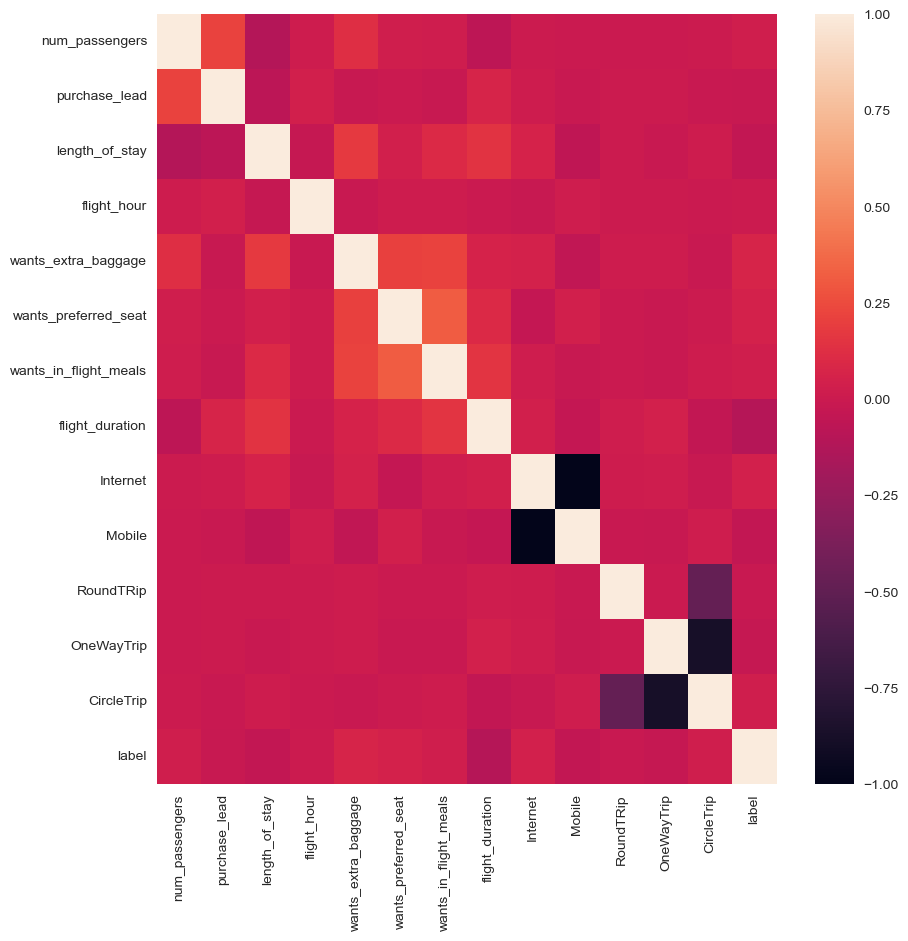

In [458]:
##Correlation matrix
corr = scaled_df_final_numeric.corr()

plt.figure(figsize=(10,10))

#plot the heatmap
sns.heatmap(corr)

In [459]:
##Splitting Train and Test Data

from sklearn.model_selection import train_test_split

X = scaled_df_final_numeric.iloc[:,:-1]
y = scaled_df_final_numeric['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.35, random_state=42)

In [460]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

!pip install yellowbrick

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [461]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [462]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


In [463]:
## Random Forecast Classifier
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [464]:
##Checking Training accuracy
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


0.9314769230769231

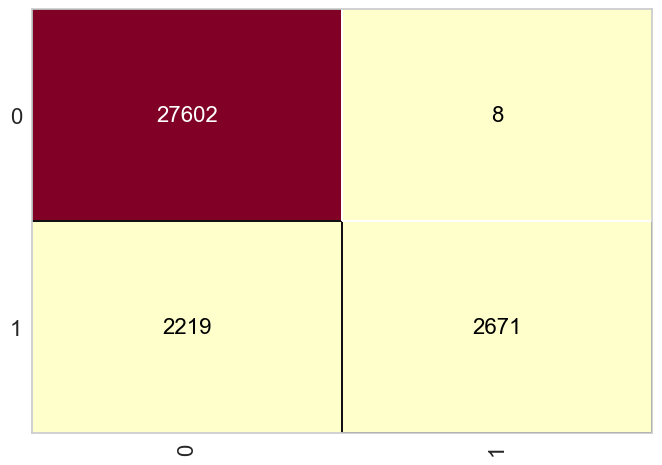

In [465]:

cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [466]:
## Checking Testing accuracy
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.39 and 0.08 respectively


0.8481142857142857

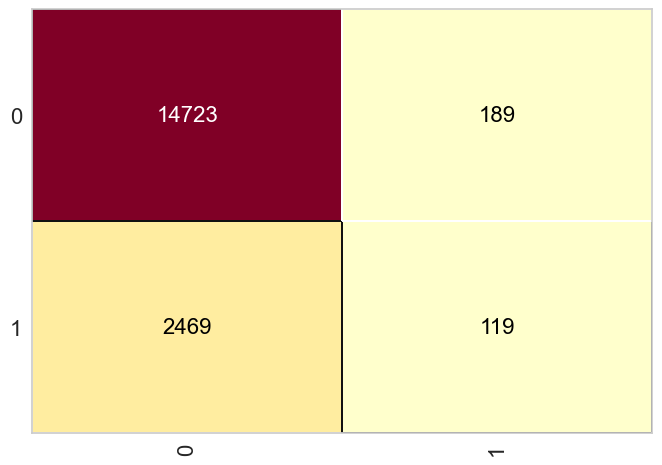

In [467]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

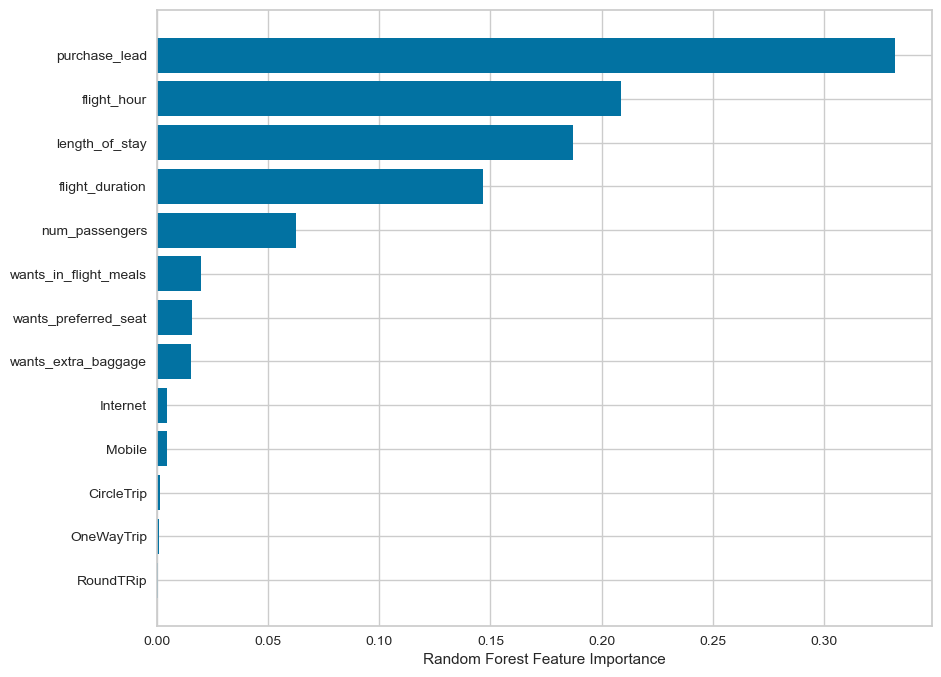

In [468]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df_final_numeric.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [469]:
## Balancing the dataset
scaled_df_final_numeric.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [470]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_final_numeric_0 = scaled_df_final_numeric[scaled_df_final_numeric.label ==0].sample(n=8000)

In [471]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_final_numeric_new = pd.concat([scaled_df_final_numeric[scaled_df_final_numeric.label==1], scaled_df_final_numeric_0], ignore_index=True)

In [472]:
#shuffle the dataframe rows
scaled_df_final_numeric_new = scaled_df_final_numeric_new.sample(frac = 1).reset_index(drop=True)

In [473]:
scaled_df_final_numeric_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,3.341415,2.200757,-0.502977,0.726759,-1.420965,-0.649919,-0.863497,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,-0.331015,0.352800,-0.936026,0.703747,-0.649919,-0.863497,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
2,-0.579559,-0.916971,1.002010,-1.305534,0.703747,1.538654,1.158082,-1.107368,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
3,-0.579559,1.028845,0.116723,2.204790,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,2.361172,0.155439,-0.119353,-0.751272,0.703747,-0.649919,1.158082,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.400684,0.885120,0.470838,0.172497,0.703747,-0.649919,1.158082,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15474,-0.579559,-0.861692,0.116723,0.726759,0.703747,-0.649919,-0.863497,-1.688589,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15475,-0.579559,0.111216,-0.561996,-0.197010,0.703747,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15476,0.400684,-0.430517,-0.089844,0.542005,-1.420965,-0.649919,1.158082,-1.688589,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [474]:
X = scaled_df_final_numeric_new.iloc[:,:-1]
y = scaled_df_final_numeric_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.35, random_state=42)

In [475]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=100,max_depth =50 , min_samples_split=5,random_state=0)

In [476]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.63, 0.61, 0.59, 0.66 and 0.6 respectively


0.6273532668881506

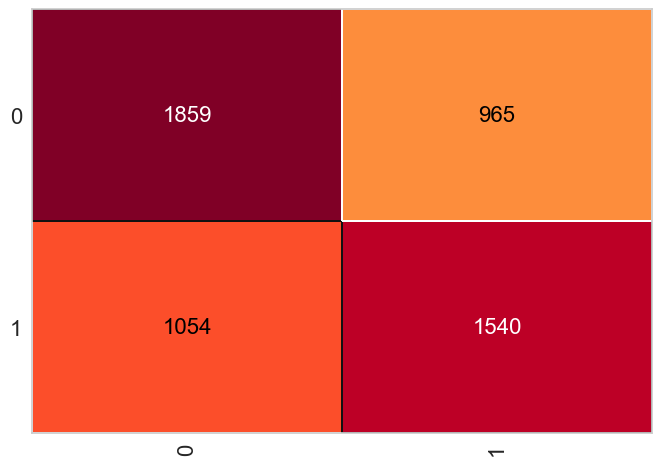

In [477]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

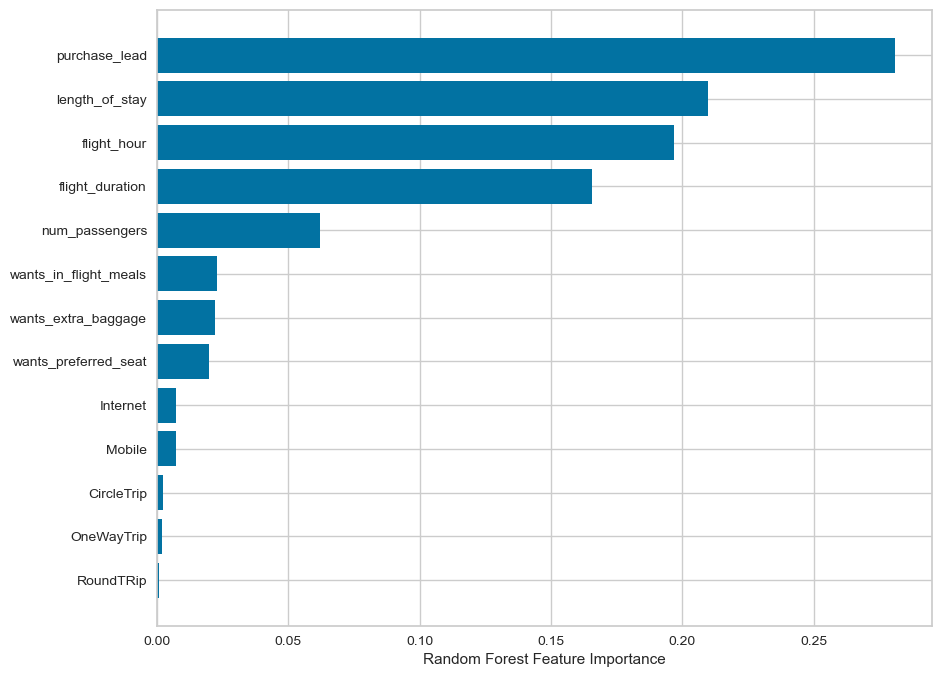

In [478]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df_final_numeric.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [479]:
# Evaluating Random Forest Classifier on Training Data
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)

# Computing Evaluation Metrics on Training Data
train_acc = acc_score(y_train, y_pred_train)
train_pre = pre_score(y_train, y_pred_train)
train_f1 = f_score(y_train, y_pred_train)

print(f"Evaluation Metrics on Training Data: Accuracy: {train_acc}, Precision: {train_pre}, F1-score: {train_f1}")

# Evaluating Random Forest Classifier on Test Data
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Computing Evaluation Metrics on Test Data
test_acc = acc_score(y_test, y_pred_test)
test_pre = pre_score(y_test, y_pred_test)
test_f1 = f_score(y_test, y_pred_test)

print(f"Evaluation Metrics on Test Data: Accuracy: {test_acc}, Precision: {test_pre}, F1-score: {test_f1}")


Evaluation Metrics on Training Data: Accuracy: 0.9733598409542743, Precision: 0.9741166803615448, F1-score: 0.9725184577522559
Evaluation Metrics on Test Data: Accuracy: 0.6273532668881506, Precision: 0.6147704590818364, F1-score: 0.6040400078446755


In [ ]:
# Remeber to conduct hyperparameter tuning or feature engineering to further enhance mdoel performance